Hi,

We have in our hand the very most wanted dataset to drive the APP Industry to **develop more and more engaging apps**. I am personally looking to see some very important results which could be driving the current generation youth.  
You all might have seen the **Social Dilemma**, the documentary which tells us about how we are loosing our control over ourself. The one thing i agree on is, **if you don't pay for the product and use it free, YOU ARE THE PRODUCT**.  

Our aim is to solve the below challenges, generate some of our own questions and later with the **reviews** data, we would like to cross check out top 5 apps, obtained from the EDA of our app data.  
#### Challenges:
- Top 5 apps with the **highest installs** with **Everyone** content rating. Subsequently, look at the ratings obtained by them.  
- Top 3 APPS in each category by RATING.
- Paid vs Free Top 5 apps with highest ratings. Further drill down to the apps with highest installs to sort them.
- Free vs Paid ration of Subscription. **Here, SUBSCRIPTION is an arbitrary column generated**. The inference obtained from this will be explained.  

In [460]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

In [461]:
summary_data = pd.read_csv('googleplaystore.csv')
reviews_data = pd.read_csv('googleplaystore_user_reviews.csv')

# Let's do some DATA Formalitites
summary_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [462]:
print('Shape of summary data:', summary_data.shape)
print('--------------------------------------------')
print('Columns in our summary of data: ',summary_data.columns)
print('--------------------------------------------')
print(summary_data.info())
print('--------------------------------------------')
print('Total Unique APPS in the data: ',summary_data.App.nunique())
print('--------------------------------------------')
print('Total Unique Categories: ',summary_data.Category.nunique())
print('--------------------------------------------')
print('Total Unique Genres: ',summary_data.Genres.nunique())
print('--------------------------------------------')
print('Total Unique Content Ratings: ',summary_data['Content Rating'].nunique())
print('--------------------------------------------')
print("Let's see the distribution of Content Ratings: ")
print(summary_data['Content Rating'].value_counts())

Shape of summary data: (10841, 13)
--------------------------------------------
Columns in our summary of data:  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1)

Now we know that Unrated has 2 entries, then instead of looking for top 5 apps, we will be looking at top 3 APPS now. Also, let's drop those entries directly which have missing data in either of the columns

In [463]:
summary_data = summary_data.dropna(axis='rows')
summary_data = summary_data.drop_duplicates(subset=['App'])
summary_data = summary_data[summary_data.Size!= 'Varies with device']
summary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 10840
Data columns (total 13 columns):
App               7021 non-null object
Category          7021 non-null object
Rating            7021 non-null float64
Reviews           7021 non-null object
Size              7021 non-null object
Installs          7021 non-null object
Type              7021 non-null object
Price             7021 non-null object
Content Rating    7021 non-null object
Genres            7021 non-null object
Last Updated      7021 non-null object
Current Ver       7021 non-null object
Android Ver       7021 non-null object
dtypes: float64(1), object(12)
memory usage: 767.9+ KB


In [464]:
import re

s = 'aaa@xxx.com bbb@yyy.com ccc@zzz.com'

print(re.sub('[a-z]*@', 'ABC', s))

ABCxxx.com ABCyyy.com ABCzzz.com


In [465]:
summary_data.Size.iloc[15]

'5.5M'

In [466]:
# Installs like 1000+,50,000,000+ doesn't looks good, as we can't compare strings properly on a logical manner. So we remove the +

def remove_plus_add_underscore(summary_data):
    summary_data['Installs'] = summary_data['Installs'].str.replace(',','')
    summary_data['Installs'] = summary_data['Installs'].str.replace('+','')
    summary_data['Content Rating'] = summary_data['Content Rating'].str.replace('+','')
    summary_data['Content Rating'] = summary_data['Content Rating'].str.replace(' ','_')
    summary_data['Installs'] = summary_data['Installs'].astype('int64')
    # Converting SIZE of APPS from KB to MB
    for i,j in enumerate(summary_data.Size):
        #print(i,j)
        if 'k' in j:
            clean_str = j.replace('k','')
            cleant_int = round(float(clean_str)*0.001,2)
        else:
            clean_str = j.replace('M','')
            cleant_int = float(clean_str)
        summary_data.Size.iloc[i] = cleant_int
        #print('Clean',cleant_int)
    return summary_data

copy_summary_data = remove_plus_add_underscore(summary_data)
copy_summary_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [467]:
copy_summary_data.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [468]:
# let's look for apps developed for everyone
def look_for_content(df,content_rating_type):
    return_df = df[df['Content Rating'] == content_rating_type].sort_values(by = 'Installs',ascending = False).head(5)
    return_df = return_df.sort_values(by = 'Rating',ascending = False).head(5).reset_index(drop=True)
    return return_df

In [469]:
for i in copy_summary_data['Content Rating'].unique():
    globals()['content_rating_%s' % i] = look_for_content(copy_summary_data,i)

In [470]:
content_rating_Everyone

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,SHAREit - Transfer & Share,TOOLS,4.6,7790693,17,500000000,Free,0,Everyone,Tools,"July 30, 2018",4.5.28_ww,4.1 and up
1,Candy Crush Saga,GAME,4.4,22426677,74,500000000,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
2,Dropbox,PRODUCTIVITY,4.4,1861310,61,500000000,Free,0,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device
3,Temple Run 2,GAME,4.3,8118609,62,500000000,Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
4,Pou,GAME,4.3,10485308,24,500000000,Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up


In [471]:
content_rating_namelist = ['content_rating_Adults_only_18','content_rating_Everyone','content_rating_Everyone_10','content_rating_Mature_17',
                      'content_rating_Teen','content_rating_Unrated']
content_rating_list = [content_rating_Adults_only_18,content_rating_Everyone,content_rating_Everyone_10,content_rating_Mature_17,
                      content_rating_Teen,content_rating_Unrated]
for i,j in zip(content_rating_namelist,content_rating_list):
        print('Top 3 Apps in :',i)
        print(j.App[:3].values,j.Rating[:3].values)

Top 3 Apps in : content_rating_Adults_only_18
['Manga Master - Best manga & comic reader'
 'DraftKings - Daily Fantasy Sports'] [4.6 4.5]
Top 3 Apps in : content_rating_Everyone
['SHAREit - Transfer & Share' 'Candy Crush Saga' 'Dropbox'] [4.6 4.4 4.4]
Top 3 Apps in : content_rating_Everyone_10
['Shadow Fight 2' 'Subway Surfers' 'Vector'] [4.6 4.5 4.4]
Top 3 Apps in : content_rating_Mature_17
['Gangstar Vegas - mafia game'
 'Z Camera - Photo Editor, Beauty Selfie, Collage'
 'Modern Combat 5: eSports FPS'] [4.5 4.4 4.3]
Top 3 Apps in : content_rating_Teen
['CM Launcher 3D - Theme, Wallpapers, Efficient'
 'VivaVideo - Video Editor & Photo Movie'
 'UC Browser - Fast Download Private & Secure'] [4.6 4.6 4.5]
Top 3 Apps in : content_rating_Unrated
['DC Universe Online Map'] [4.1]


#### Point 1 and 2:  

Category: Adult 18+:
- 'Manga Master - Best manga & comic reader',
- 'DraftKings - Daily Fantasy Sports',
- 'Manga Books'  

Category: Everyone
- 'Google',
- 'Google Chrome: Fast & Secure',
- 'Maps - Navigate & Explore' 

Category: Everyone 10+
- Subway Surfers

Category: Mature 17+
- 'Sniper 3D Gun Shooter: Free Shooting Games - FPS',
- 'Z Camera - Photo Editor, Beauty Selfie, Collage',
- 'Twitter'

Category: Teen
- 'Instagram',
- 'YouTube',
- 'Google Play Games'  

Instagram has a rating of 4.5 which makes it more valuable and more usable than Facebook/Youtube at this moment. So if a company is looking to advertise their  **brands/products**, the top 3 apps to look for are:  
- Manga Master
- Sniper 3D Gun Shooter
- Instagram  


Let's look on point: 
- Paid vs Free Top 5 apps with highest ratings. 

In [472]:
def paid_vs_free(df):
    paid_apps = df[df.Type == 'Paid'].sort_values(by = 'Rating',ascending = False).reset_index().head(5)
    free_apps = df[df.Type == 'Free'].sort_values(by = 'Rating',ascending = False).reset_index().head(5)
    paid_apps_info = paid_apps.set_index(paid_apps.App).to_dict()['Rating']
    free_apps_info = paid_apps.set_index(free_apps.App).to_dict()['Rating']
    return paid_apps_info,free_apps_info

In [473]:
print('Paid vs Free: ',paid_vs_free(copy_summary_data))

Paid vs Free:  ({'FHR 5-Tier 2.0': 5.0, 'AC DC Power Monitor': 5.0, '30WPM Amateur ham radio Koch CW Morse code trainer': 5.0, 'Morse Player': 5.0, 'meStudying: AP English Lit': 5.0}, {'BJ Foods': 5.0, 'DV ASSIST': 5.0, 'EF Academy': 5.0, 'CJ Gospel Hour': 5.0, 'iCard BD Plus': 5.0})


Now we know that there are 5 such TOP apps in both the Paid/Free type. Let's sort them on installs and then look again at the top values.  
This would solve our objective number 3.

In [474]:
# Let's look at other details for sure of these apps after sorting out
paid_apps = copy_summary_data[copy_summary_data.Type == 'Paid'].sort_values(by = 'Rating',ascending = False).reset_index().head(5)
paid_apps = paid_apps.sort_values(by = 'Installs',ascending = False).reset_index(drop=True).drop(columns = 'index')
paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,FHR 5-Tier 2.0,MEDICAL,5.0,2,1.2,500,Paid,$2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up
1,Morse Player,FAMILY,5.0,12,2.4,100,Paid,$1.99,Everyone,Education,"January 23, 2017",2.1.1,3.0 and up
2,AC DC Power Monitor,LIFESTYLE,5.0,1,1.2,10,Paid,$3.04,Everyone,Lifestyle,"May 29, 2016",1.2,2.3 and up
3,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3.7,10,Paid,$1.49,Everyone,Education,"May 18, 2018",2.0.2,2.1 and up
4,meStudying: AP English Lit,FAMILY,5.0,1,0.66,10,Paid,$4.99,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up


In [475]:
free_apps = copy_summary_data[copy_summary_data.Type == 'Free'].sort_values(by = 'Rating',ascending = False).reset_index().head(5)
free_apps = free_apps.sort_values(by = 'Installs',ascending = False).reset_index(drop=True).drop(columns = 'index')
free_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,iCard BD Plus,SOCIAL,5.0,2,2.4,500,Free,0,Everyone,Social,"July 15, 2016",3.7.5,2.0 and up
1,DV ASSIST,FAMILY,5.0,1,18,100,Free,0,Everyone,Education,"August 2, 2018",1.0,4.4 and up
2,CJ Gospel Hour,SOCIAL,5.0,7,18,100,Free,0,Everyone,Social,"July 25, 2018",1.0,4.4 and up
3,EF Academy,HEALTH_AND_FITNESS,5.0,4,15,50,Free,0,Everyone,Health & Fitness,"March 23, 2018",7.7.3,4.1 and up
4,BJ Foods,BUSINESS,5.0,3,1.5,10,Free,0,Everyone,Business,"February 7, 2018",2.7,4.1 and up


In [476]:
paid_and_free = pd.concat([paid_apps,free_apps]).reset_index(drop=True)
paid_and_free

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,FHR 5-Tier 2.0,MEDICAL,5.0,2,1.2,500,Paid,$2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up
1,Morse Player,FAMILY,5.0,12,2.4,100,Paid,$1.99,Everyone,Education,"January 23, 2017",2.1.1,3.0 and up
2,AC DC Power Monitor,LIFESTYLE,5.0,1,1.2,10,Paid,$3.04,Everyone,Lifestyle,"May 29, 2016",1.2,2.3 and up
3,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3.7,10,Paid,$1.49,Everyone,Education,"May 18, 2018",2.0.2,2.1 and up
4,meStudying: AP English Lit,FAMILY,5.0,1,0.66,10,Paid,$4.99,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up
5,iCard BD Plus,SOCIAL,5.0,2,2.4,500,Free,0,Everyone,Social,"July 15, 2016",3.7.5,2.0 and up
6,DV ASSIST,FAMILY,5.0,1,18,100,Free,0,Everyone,Education,"August 2, 2018",1.0,4.4 and up
7,CJ Gospel Hour,SOCIAL,5.0,7,18,100,Free,0,Everyone,Social,"July 25, 2018",1.0,4.4 and up
8,EF Academy,HEALTH_AND_FITNESS,5.0,4,15,50,Free,0,Everyone,Health & Fitness,"March 23, 2018",7.7.3,4.1 and up
9,BJ Foods,BUSINESS,5.0,3,1.5,10,Free,0,Everyone,Business,"February 7, 2018",2.7,4.1 and up


#### Point 3:  

I can clearly see, that the free applications have more **Installs** than **Paid** applications. So, if we advertise something over the free applications, we have more chance of reaching a greater audience.


In [477]:
labels = ['Paid','Free']
installs = [paid_and_free.groupby('Type').get_group('Paid')['Installs'].sum(),paid_and_free.groupby('Type').get_group('Free')['Installs'].sum()]
explode = (0,0.2)

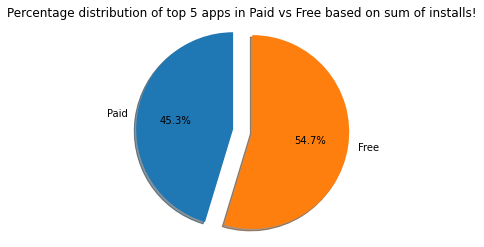

In [478]:
fig1,ax1 = plt.subplots()
ax1.pie(installs,explode = explode,labels = labels,autopct = '%1.1f%%',shadow = True,startangle = 90)
ax1.axis('equal')
plt.title('Percentage distribution of top 5 apps in Paid vs Free based on sum of installs!')
plt.show()

I just thought, let's plot the same plot for the whole data, let's see if we get something interesting.

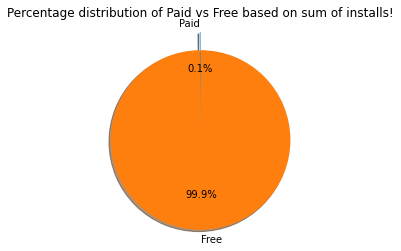

In [479]:
labels = ['Paid','Free']
installs = [copy_summary_data.groupby('Type').get_group('Paid')['Installs'].sum(),copy_summary_data.groupby('Type').get_group('Free')['Installs'].sum()]
explode = (0,0.2)
fig1,ax1 = plt.subplots()
ax1.pie(installs,explode = explode,labels = labels,autopct = '%1.1f%%',shadow = True,startangle = 90)
ax1.axis('equal')
plt.title('Percentage distribution of Paid vs Free based on sum of installs!')
plt.show()

So, this is weird, this means that from the whole data, we see that PAID apps are not making much of an impact or influencing the users. I am not sure, how much we can rely on this inference, but sure about the inference we obtained from the TOP 5 Paid vs Free apps inference.  
This EDA will be definitely helping the people who are in the business of MARKETING as they look to expand and reach greater audience.  

#### Point 4:  

Now this is an interesting task, which we'll be doing. This is an IDEA suggested by my younger sister, who asked me that the apps which are actually free tends to have **SUBSCRIPTION** facilities for more features, like **CLASH OF CLANS, MEDIUM** for instance which i play a lot. SO, she wanted to identify, the ratio/proportion/distributioon of such apps in FREE and PAID Categories, and then look for the apps with highest ratings.  

This would imply that if an app **X** is free but has option of subscription and has the highest rating also along with installs, that means that the app has a greater reach and users are willing to pay for subscription for some exclusive features.

So, here we donot have a **SUBSCRIPTION** column, so we will build a random generated binary column with **1 -> subscription, 0 -> No subscription** and then do our analysis.  
This would help us, that if somehow we get **original/raw subscription** column somehow, this would change the game of advertising. As there, we can lure some of our customers with the feature of subscription.  

Let's see how this works out!

In [480]:
# Creating a random binary column
copy_summary_data['Subscription'] = np.random.randint(0,2,size = len(copy_summary_data))
copy_summary_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [481]:
copy_summary_data.Subscription.value_counts()

1    3580
0    3441
Name: Subscription, dtype: int64

In [482]:
paid_subscribe = copy_summary_data.loc[(copy_summary_data.Type == 'Paid') & (copy_summary_data.Subscription == 1)].sort_values(by='Installs',ascending=False).reset_index(drop=True)
free_subscribe = copy_summary_data.loc[(copy_summary_data.Type == 'Free') & (copy_summary_data.Subscription == 1)].sort_values(by='Installs',ascending=False).reset_index(drop=True)

In [483]:
paid_subscribe.sort_values(by = 'Rating',ascending = False).reset_index().head(5)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,276,USMLE Step 2 CK Flashcards,FAMILY,5.0,1,40,10,Paid,$19.99,Everyone,Education,"May 26, 2014",2.47,2.2 and up,1
1,275,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3.7,10,Paid,$1.49,Everyone,Education,"May 18, 2018",2.0.2,2.1 and up,1
2,248,CA Speakers,LIFESTYLE,5.0,12,1.2,100,Paid,$0.99,Teen,Lifestyle,"March 25, 2014",1.0,3.0 and up,1
3,246,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,27,100,Paid,$4.99,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up,1
4,264,BC MVA Fines,BOOKS_AND_REFERENCE,5.0,5,7.2,50,Paid,$1.75,Everyone,Books & Reference,"October 8, 2015",1.0,4.1 and up,1


In [484]:
free_subscribe.sort_values(by = 'Rating',ascending = False).reset_index().head(5)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,3302,KBA-EZ Health Guide,MEDICAL,5.0,4,25,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,1
1,3147,Unity CF,LIFESTYLE,5.0,5,8.3,100,Free,0,Everyone,Lifestyle,"April 12, 2016",1.0,4.0.3 and up,1
2,3161,CJ'S TIRE AND AUTO INC.,PRODUCTIVITY,5.0,5,11,100,Free,0,Everyone,Productivity,"May 30, 2018",1.0.1,4.1 and up,1
3,3160,Eternal Light AG,SOCIAL,5.0,30,13,100,Free,0,Teen,Social,"May 19, 2018",1.04,4.0.3 and up,1
4,2709,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,12,5000,Free,0,Everyone,Comics,"July 31, 2018",1.0.5,5.0 and up,1


One thing which is very clear that the APPS which might have install and review rating as 5.0 doesn't helps our business. Hence we fix that: **sort by INSTALLS and then pick the TOP 5 APPS**, see their Rating and we can decide the next R&D for an APP to be developed.

In [485]:
# Again we combine them:
paid_and_free_subscribe = pd.concat([paid_subscribe.head(5),free_subscribe.head(5)]).reset_index(drop=True)
paid_and_free_subscribe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14,1000000,Paid,$2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,1
1,Card Wars - Adventure Time,FAMILY,4.3,129603,23,1000000,Paid,$2.99,Everyone_10,Card;Action & Adventure,"February 11, 2016",1.11.0,2.3.3 and up,1
2,Infinity Dungeon VIP,FAMILY,4.3,21804,44,1000000,Paid,$0.99,Everyone_10,Role Playing,"July 3, 2018",2.6.6,2.3 and up,1
3,Grand Theft Auto: San Andreas,GAME,4.4,348962,26,1000000,Paid,$6.99,Mature_17,Action,"March 21, 2015",1.08,3.0 and up,1
4,Cut the Rope GOLD,FAMILY,4.6,61264,43,1000000,Paid,$0.99,Everyone,Puzzle,"June 19, 2018",3.7.0,4.1 and up,1
5,Dropbox,PRODUCTIVITY,4.4,1861310,61,500000000,Free,0,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device,1
6,imo free video calls and chat,COMMUNICATION,4.3,4785892,11,500000000,Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up,1
7,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70,500000000,Free,0,Everyone,Health & Fitness,"July 31, 2018",5.17.2.009,5.0 and up,1
8,Pou,GAME,4.3,10485308,24,500000000,Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up,1
9,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58,100000000,Free,0,Mature_17,Action,"July 24, 2018",3.2.1c,4.0 and up,1


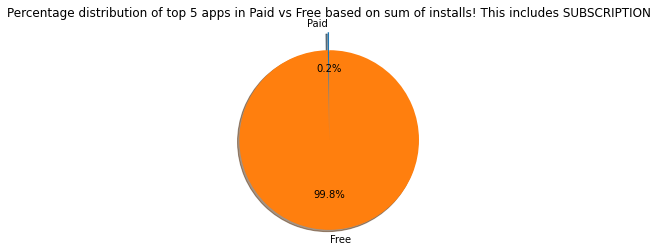

In [486]:
labels = ['Paid','Free']
installs = [paid_and_free_subscribe.groupby('Type').get_group('Paid')['Installs'].sum(),paid_and_free_subscribe.groupby('Type').get_group('Free')['Installs'].sum()]
explode = (0,0.2)
fig1,ax1 = plt.subplots()
ax1.pie(installs,explode = explode,labels = labels,autopct = '%1.1f%%',shadow = True,startangle = 90)
ax1.axis('equal')
plt.title('Percentage distribution of top 5 apps in Paid vs Free based on sum of installs! This includes SUBSCRIPTION')
plt.show()

So, here what we can deduce is that **If we assume our subscription column to be holding TRUE values, then the free apps with subscription facilities dominate heavily in the market**.  
Apps like **Google Photos** and **Subway Surfers** domainate heavily the installs and hence the product can be brought to a greater audience using these 2 apps.  


#### Challenges at some rule-based scenarios:  
- Look for APPS with **Rating > 4.5** and see the distribution of the Category column. This will give us the fair bit of idea as what kind of APPS are more likely to succeed. Even we can look at their SIZES/GENRES and Type.  
- Find all the apps in GAME category and look for the APP with the highest number of Installs. We will use this APP as one of the APPS for finding reviews.  
- Five Apps picked till now:  
    - Where's My Water?		
    - Gmail		
    - Five Nights at Freddy's		
    - Messenger – Text and Video Chat for Free	
    - Subway Surfers  

In [487]:
rating_greater_4_point_5 = copy_summary_data[copy_summary_data.Rating >=4.5].sort_values(by = 'Installs',ascending=False).reset_index(drop=True)
rating_greater_4_point_5_games = rating_greater_4_point_5[rating_greater_4_point_5.Category == 'GAME'].reset_index(drop=True)
rating_greater_4_point_5_games.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,Subway Surfers,GAME,4.5,27722264,76,1000000000,Free,0,Everyone_10,Arcade,"July 12, 2018",1.90.0,4.1 and up,0
1,ROBLOX,GAME,4.5,4447388,67,100000000,Free,0,Everyone_10,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,1
2,Angry Birds 2,GAME,4.6,3883589,57,100000000,Free,0,Everyone,Casual,"July 26, 2018",2.21.1,4.1 and up,0
3,Yes day,GAME,4.5,10055521,94,100000000,Free,0,Everyone,Casual,"June 28, 2018",1_39_93,4.0.3 and up,0
4,Crossy Road,GAME,4.5,4230886,60,100000000,Free,0,Everyone,Action,"August 1, 2018",3.1.0,5.0 and up,1


- 3 More apps just related to gaming:  
    - My Talking Tom  
    - Score! Hero (I play this game!😛)  
    - Cooking Fever
    
- Note: **Due to running notebook again and again, our Subscription column will keep variating, so that's why already fixed the apps from the first run.**

In [488]:
# Apps to look for as suggested by colleagues
apps_to_look_for = ['Google Pay','PUBG MOBILE','PayPal','Ludo Family Dice Game','Amazon Shopping']
df = pd.DataFrame(columns=copy_summary_data.columns.to_list())
ready_df = pd.DataFrame(columns=copy_summary_data.columns.to_list())
for i in apps_to_look_for:
    df = copy_summary_data[copy_summary_data.App == i]
    ready_df = pd.concat([ready_df,df]).reset_index(drop=True)


In [489]:
ready_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,PUBG MOBILE,GAME,4.4,3715656,36,50000000,Free,0,Teen,Action,"July 24, 2018",0.7.0,4.3 and up,0
1,PayPal,FINANCE,4.3,659741,47,50000000,Free,0,Everyone,Finance,"July 18, 2018",6.28.0,4.4 and up,1
2,Ludo Family Dice Game,FAMILY,4.2,3593,19,500000,Free,0,Everyone,Board;Brain Games,"March 7, 2018",1.4,4.1 and up,1
3,Amazon Shopping,SHOPPING,4.3,909226,42,100000000,Free,0,Teen,Shopping,"July 31, 2018",16.14.0.100,4.4 and up,0


These apps are suggested by my peers to look for and provide some insights.  

**Need to answer the below questions: ** 
1. What is the most popular category that has the largest number of installs.  
2. Which application has the largest size.  
3. Which app has not been updated for a long time. This can be done by comparing the current date with the last date that the      app was actually updated.  
4. Which app has the largest number of installs.  
5. For the years 2016, 2017, 2018 what are the category of apps that have got the most downloads.  
6. Which application has the largest number of reviews?  


##### 1. What is the most popular category that has the largest number of installs.  

In [490]:
category_with_largest_installs = copy_summary_data.groupby('Category').agg({'Installs':'sum'}).sort_values(by = 'Installs',ascending=False).reset_index()
category_with_largest_installs

# Let's try to plot the same

,Category,Installs
0,GAME,11532352717
1,FAMILY,3552661580
2,TOOLS,2879553500
3,COMMUNICATION,1817915530
4,PHOTOGRAPHY,1493893130
5,PRODUCTIVITY,1296302080
6,NEWS_AND_MAGAZINES,1190900550
7,PERSONALIZATION,895131930
8,VIDEO_PLAYERS,866662200
9,SPORTS,806311465


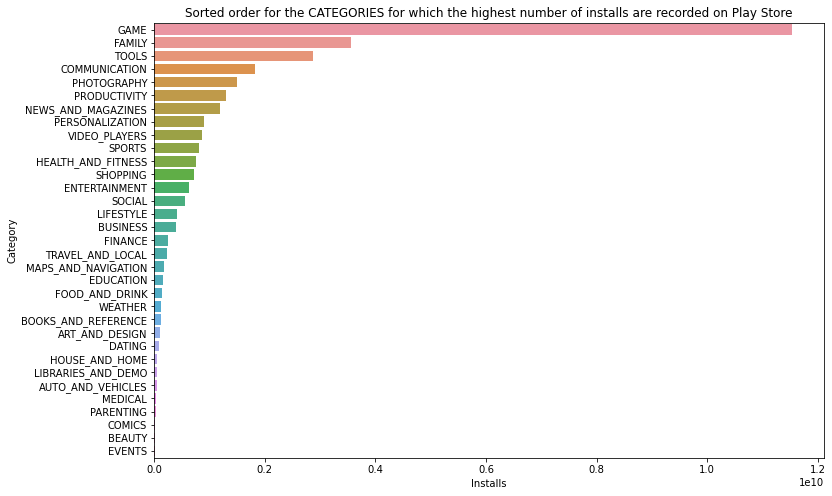

In [491]:
plt.figure(figsize=(12,8))
sns.barplot(y = 'Category', x ='Installs',data = category_with_largest_installs)
plt.title('Sorted order for the CATEGORIES for which the highest number of installs are recorded on Play Store');
plt.show();

###### What is the most popular category that has the largest number of installs. -> GAMES

##### 2. Which application has the largest size.  

In [492]:
app_with_larget_size = copy_summary_data.sort_values(by = 'Size',ascending = False)
app_with_larget_size.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
1758,Hungry Shark Evolution,GAME,4.5,6074334,100,100000000,Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,1
8409,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100,10000,Free,0,Everyone,Racing,"May 20, 2018",1.03,4.1 and up,1
9170,Stickman Legends: Shadow Wars,GAME,4.4,38419,100,1000000,Paid,$0.99,Everyone_10,Action,"August 3, 2018",2.3.24,4.1 and up,1
5865,Gangster Town: Vice District,FAMILY,4.3,65146,100,10000000,Free,0,Mature_17,Simulation,"May 31, 2018",2.1,4.0 and up,0
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100,5000000,Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up,1


In [502]:
# We now know that the Apps we are dealing with has maximum of 100MB as size in our dataset
copy_summary_data.groupby('Size').get_group(100).sort_values(by = 'Rating',ascending=False).reset_index(drop=True).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription
0,Navi Radiography Pro,MEDICAL,4.7,11,100,500,Paid,$15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up,0


###### Which application has the largest size. -> Navi RadiographyPro which is a highly paid APP

##### 3. Which app has not been updated for a long time. This can be done by comparing the current date with the last date that the app was actually updated.  

In [515]:
import datetime
#copy_summary_data['Last Updated'] = pd.to_datetime(copy_summary_data['Last Updated'],coerce=True)
copy_summary_data['Date Diff'] = pd.to_datetime(copy_summary_data['Last Updated']) - pd.Timestamp.now().normalize() 
copy_summary_data['Date Diff'] = copy_summary_data['Date Diff']*-1
copy_summary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 10840
Data columns (total 15 columns):
App               7021 non-null object
Category          7021 non-null object
Rating            7021 non-null float64
Reviews           7021 non-null object
Size              7021 non-null object
Installs          7021 non-null int64
Type              7021 non-null object
Price             7021 non-null object
Content Rating    7021 non-null object
Genres            7021 non-null object
Last Updated      7021 non-null datetime64[ns]
Current Ver       7021 non-null object
Android Ver       7021 non-null object
Subscription      7021 non-null int32
Date Diff         7021 non-null timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(10), timedelta64[ns](1)
memory usage: 850.2+ KB


In [516]:
copy_summary_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription,Date Diff
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0,989 days
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0,981 days
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,783 days
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0,837 days
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0,825 days


In [518]:
copy_summary_data[copy_summary_data['Date Diff'] == max(copy_summary_data['Date Diff'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription,Date Diff
7479,FML F*ck my life + widget,FAMILY,4.2,1415,0.21,100000,Free,0,Everyone,Entertainment,2010-05-21,3.1,1.5 and up,0,3777 days


##### Which app has not been updated for a long time. This can be done by comparing the current date with the last date that the app was actually updated. -> F*ck my life + widget. It has not been updated since past 10 years.

##### 4. Which app has the largest number of installs.  

In [519]:
copy_summary_data.sort_values(by = 'Installs',ascending = False).reset_index(drop=True).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Subscription,Date Diff
0,Subway Surfers,GAME,4.5,27722264,76,1000000000,Free,0,Everyone_10,Arcade,2018-07-12,1.90.0,4.1 and up,0,803 days


##### Which app has the largest number of installs. -> Subway Surfers.

##### 5. For the years 2016, 2017, 2018 what are the category of apps that have got the most downloads.  

In [541]:
year_2016 = copy_summary_data[copy_summary_data['Last Updated'].dt.year == 2016].sort_values(by = 'Installs',ascending=False).reset_index(drop=True)
year_2017 = copy_summary_data[copy_summary_data['Last Updated'].dt.year == 2017].sort_values(by = 'Installs',ascending=False).reset_index(drop=True)
year_2018 = copy_summary_data[copy_summary_data['Last Updated'].dt.year == 2018].sort_values(by = 'Installs',ascending=False).reset_index(drop=True)
print('Category in 2016 which got highest Installs is:"', year_2016['Category'][0],'",','has installs count around:"',year_2016['Installs'][0],'".')
print('Category in 2017 which got highest Installs is:"', year_2017['Category'][0],'",','has installs count around:"',year_2017['Installs'][0],'".')
print('Category in 2018 which got highest Installs is:"', year_2018['Category'][0],'",','has installs count around:"',year_2018['Installs'][0],'".')

Category in 2016 which got highest Installs is:" GAME ", has installs count around:" 100000000 ".
Category in 2017 which got highest Installs is:" GAME ", has installs count around:" 100000000 ".
Category in 2018 which got highest Installs is:" NEWS_AND_MAGAZINES ", has installs count around:" 1000000000 ".


##### 6. Which application has the largest number of reviews? 

In [548]:
largest_reviews = copy_summary_data.sort_values(by = 'Reviews',ascending = False).reset_index(drop=True)
print('App with the Maximum Reviews:"',largest_reviews['App'][0],largest_reviews['Reviews'][0],'"')
print('App with the Second Maximum Reviews:"',largest_reviews['App'][1],largest_reviews['Reviews'][1],'"')

App with the Maximum Reviews:" GollerCepte Live Score 9992 "
App with the Second Maximum Reviews:" Ad Block REMOVER - NEED ROOT 999 "


## Thank You